In [1]:
# ライブラリ
import urllib  #HTMLにアクセス＆取得
from bs4 import BeautifulSoup #HTMLからデータ抽出
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

In [2]:
# スクレイピング
url = 'https://baseball-data.com/21/stats/hitter-all/hr-1.html'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

In [3]:
table = soup.find_all('table')[0] # HTMLから表部分を全て取得
rows = table.find_all('tr') # 表から行データを取得

In [4]:
# データ格納
head_data = []
player_data = []

for i, row in enumerate(rows):
    if i == 0: # 1行目
        for headerValue in row.find_all('th'):
            head_data.append(headerValue.get_text())
    elif (i > 0) and (i + 1 < len(rows)): # 2行目〜最終行未満
        player_row = []
        for playerValue in row.find_all('td'):
            player_row.append(playerValue.get_text())
        player_data.append(player_row)

In [20]:
# データフレーム型に変換
df = pd.DataFrame(data = player_data, columns = head_data)
df.head()

,順位,選手名,チーム,打率,試合,打席数,打数,安打,本塁打,打点,...,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27
0,1,村上 宗隆,ヤクルト,.278,143,615,500,139,39,112,...,106,6,133,0,12,.408,.566,.974,8.02,7.94
1,1,岡本 和真,巨人,.265,143,592,521,138,39,113,...,57,7,108,0,16,.341,.530,.871,6.04,6.17
2,3,鈴木 誠也,広島,.317,132,533,435,138,38,88,...,87,6,88,0,7,.433,.639,1.072,10.03,9.77
3,4,山田 哲人,ヤクルト,.272,137,581,493,134,34,101,...,76,5,100,0,10,.370,.515,.885,6.71,6.84
4,5,杉本 裕太郎,オリックス,.301,134,542,478,144,32,83,...,51,10,116,0,15,.378,.552,.931,7.11,7.00


In [21]:
df.shape

(208, 21)

In [6]:
# CSV出力
df.to_csv('playerdata.csv', header=True, index=False)

In [7]:
# CSV読み込み
df = pd.read_csv('playerdata.csv')

In [8]:
# 中日以外の11球団データを抽出
df11 = df[df['チーム'] != '中日']
# 中日のデータを抽出
df_d = df[df['チーム'] == '中日']

In [9]:
# 本塁打との相関係数
df_homerun = pd.DataFrame(df11.corr()['本塁打'])
df_homerun

,本塁打
順位,-0.861999
打率,0.427335
試合,0.638588
打席数,0.716094
打数,0.706636
安打,0.711780
本塁打,1.000000
打点,0.913095
盗塁,0.073535
四球,0.741690


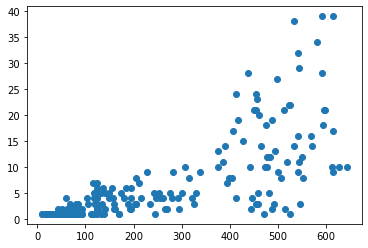

In [10]:
# 可視化（相関高い長打率）
plt.scatter(x = df11['打席数'], y = df11['本塁打'])
plt.show()

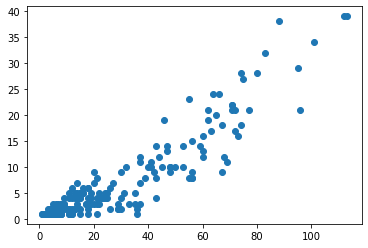

In [11]:
# 可視化（相関高い打点）
plt.scatter(x = df11['打点'], y = df11['本塁打'])
plt.show()

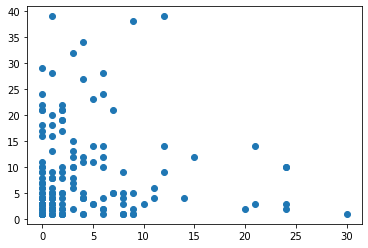

In [12]:
# 可視化（相関低い盗塁）
plt.scatter(x = df11['盗塁'], y = df11['本塁打'])
plt.show()

In [13]:
# 相関係数が0.7以上の項目を抽出
x_columns = df_homerun[df_homerun['本塁打'] >= 0.7].index.tolist()
# x_columnsに塁打、三塁打、二塁打、単打を渡してみる
#x_columns = ['安打', '二塁打', '三塁打', '塁打']
# 目的変数を除外
x_columns.remove('本塁打')

In [14]:
# 相関係数0.7以上の説明変数確認
x_columns

['打席数', '打数', '安打', '打点', '四球', '三振']

In [15]:
# 説明変数と目的変数を定義
X = df11[x_columns]
y = df11['本塁打']

モデル作成・評価

In [16]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# モデルの学習
lr = LR()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# 予測値の算出
y_pred_test = lr.predict(X_test)
y_pred_test

array([15.50869587,  6.91104609,  2.95296692, -0.35937504,  4.35863856,
        4.01465987, 13.69350842,  6.17904066,  1.6401536 ,  5.49843677,
        8.24929095, 19.92324981,  4.10617934,  0.40640588,  0.65657734,
        4.0763156 ,  1.1571679 ,  8.55875036, 24.81233268,  6.58424273,
        3.98787473,  1.47137067,  0.65495673,  3.32936076,  7.38247885,
        3.9747686 , 18.46023767,  3.78905307, -1.05886236, 11.89479495,
       28.915028  ,  2.57167449,  1.5799854 , 20.02984407,  2.700073  ,
        3.32199252,  1.77161112,  9.75738607, 16.94307577,  2.07365296,
       15.78689318,  3.47232453,  5.53018157, 10.12196861,  6.85293035,
        5.08544954, 19.38567632, 29.60475472])

In [18]:
# MSEの算出
mse_test = MSE(y_test, y_pred_test)
mse_test

11.045153998554603

In [19]:
# RMSEの算出
rmse_test = np.sqrt(mse_test)
rmse_test

3.3234250403092593

予測

In [22]:
# 中日データ（説明変数）
x_d = df_d[x_columns]
# 予測本塁打数の算出
y_pred_d = lr.predict(x_d)
# 予測本塁打列の追加
df_d['予測本塁打'] = np.round(y_pred_d).astype(np.int32)
# 予測値と実測値との比較
df_dd = df_d[['選手名', '本塁打', '予測本塁打']]
df_dd = pd.DataFrame(df_dd)
df_dd

/var/folders/41/791kfl912mbb2ndn2ly5_y240000gn/T/ipykernel_8269/2401879782.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['予測本塁打'] = np.round(y_pred_d).astype(np.int32)


,選手名,本塁打,予測本塁打
25,ビシエド,17,17
42,木下 拓哉,11,11
63,福田 永将,8,7
74,高橋 周平,5,8
82,阿部 寿樹,5,3
83,堂上 直倫,5,6
98,福留 孝介,4,6
113,京田 陽太,3,1
140,渡辺 勝,2,2
144,Ａ．マルティネス,2,2
